### 한국에서 코로나 바이러스에 감염된 사람들 데이터셋 처리

 - csv 파일 형식
 
 - column 항목
 
 > 0. id: 확진자의 id (n번째 확진자)
 > 
 > 1. sex: 성별
 > 
 > 2. birth_year: 출생 연도
 > 
 > 3. country: 국적
 > 
 > 4. region: 주 활동 지역 (광역시/도 단위)
 > 
 > 5. disease : 기저 질환
 >
 > 6. group: 특정 집단 관련
 > 
 > 7. infection_reason: 감염 경로
 > 
 > 8. infection_order: 감염 차수 (n차 감염)
 > 
 > 9. infected_by: 해당 확진자의 감염원 id
 > 
 > 10. contact_number: 접촉자 수
 > 
 > 11. confirmed_date: 확진 일자
 > 
 > 12. released_date: 퇴원 일자 (격리 해제 일자)
 > 
 > 13. deceased_date: 사망 일자
 > 
 > 14. state: 상태

In [2]:
# draw charts
%matplotlib notebook

from matplotlib import pyplot as plt
import numpy as np

In [3]:
# CSV 파일 읽어들이기

import csv  # csv 모듈 임포트
import pprint

# 파일 위치, 경로 정의
file_path = '01_South_Korea/patient.csv'

# patient.csv 파일 열기
with open(file_path) as file:
    reader = csv.reader(file)  # CSV 파일을 읽어들이는 읽기 객체
    raw = list(reader)      #  CSV 파일 내용을 리스트로 읽어들인다

pprint.pprint(raw[:10])  # 읽어들인 내용을 화면에 출력

[['patient_id',
  'sex',
  'birth_year',
  'country',
  'region',
  'disease',
  'group',
  'infection_reason',
  'infection_order',
  'infected_by',
  'contact_number',
  'confirmed_date',
  'released_date',
  'deceased_date',
  'state'],
 ['1',
  'female',
  '1984',
  'China',
  'filtered at airport',
  '',
  '',
  'visit to Wuhan',
  '1',
  '',
  '45',
  '2020-01-20',
  '2020-02-06',
  '',
  'released'],
 ['2',
  'male',
  '1964',
  'Korea',
  'filtered at airport',
  '',
  '',
  'visit to Wuhan',
  '1',
  '',
  '75',
  '2020-01-24',
  '2020-02-05',
  '',
  'released'],
 ['3',
  'male',
  '1966',
  'Korea',
  'capital area',
  '',
  '',
  'visit to Wuhan',
  '1',
  '',
  '16',
  '2020-01-26',
  '2020-02-12',
  '',
  'released'],
 ['4',
  'male',
  '1964',
  'Korea',
  'capital area',
  '',
  '',
  'visit to Wuhan',
  '1',
  '',
  '95',
  '2020-01-27',
  '2020-02-09',
  '',
  'released'],
 ['5',
  'male',
  '1987',
  'Korea',
  'capital area',
  '',
  '',
  'visit to Wuhan',
  '1',
 

In [4]:
# 전체 환자 수
print("전체 확진자의 수 : " + str(len(raw[1:])))

전체 확진자의 수 : 7869


In [5]:
# 안내를 위한 row를 삭제
raw_ = raw[1:]

### 성별에 따른 확진자 수

In [6]:
# 남자와 여자 환자의 수
male = 0
female = 0
nope_sex = 0

for i in range(len(raw_)):
    sex_of_patient = raw_[i][1]
    
    if(sex_of_patient == 'male'):
        male = male + 1
    elif(sex_of_patient == 'female'):
        female = female + 1
    else:
        nope_sex = nope_sex + 1
        
print("여자 확진자 : " + str(female))
print("남자 확진자 : " + str(male))
print("???? 확진자 : " + str(nope_sex))

여자 확진자 : 393
남자 확진자 : 286
???? 확진자 : 7190


<IPython.core.display.Javascript object>


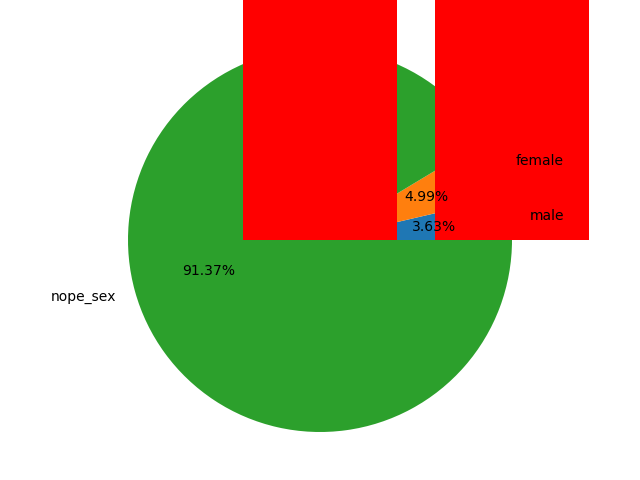

In [7]:
# draw pie chart

fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.axis('equal')
type_of_sex = ['male', 'female', 'nope_sex']
patient_sex = [male,female,nope_sex]
ax.pie(patient_sex, labels = type_of_sex, autopct='%1.2f%%')
plt.show()

In [8]:
# I wnat to use Korean!
from matplotlib import font_manager, rc
font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
rc('font', family=font_name)

# draw bar chart
type_of_sex = type_of_sex[:2]
patient_sex = patient_sex[:2]

x_pos = [i for i, _ in enumerate(type_of_sex)]

plt.bar(x_pos, patient_sex, color='red')
plt.xlabel("gender")
plt.ylabel("number of patients")
plt.title("성별에 따른 확진자 수")

plt.xticks(x_pos, type_of_sex)

plt.show()

### 사망자와 완치자

In [9]:
# 사망자와 완치자의 수
deceased = 0
released = 0
infected = 0

for i in range(len(raw_)):
    state_of_patient = raw_[i][14]
    
    if(state_of_patient == 'deceased'):
        deceased = deceased + 1
    elif(state_of_patient == 'released'):
        released = released + 1
    else:
        infected = infected + 1
        
print("사망자 : " + str(deceased))
print("완치자 : " + str(released))
print("감염자 : " + str(infected))

사망자 : 36
완치자 : 56
감염자 : 7777


<IPython.core.display.Javascript object>


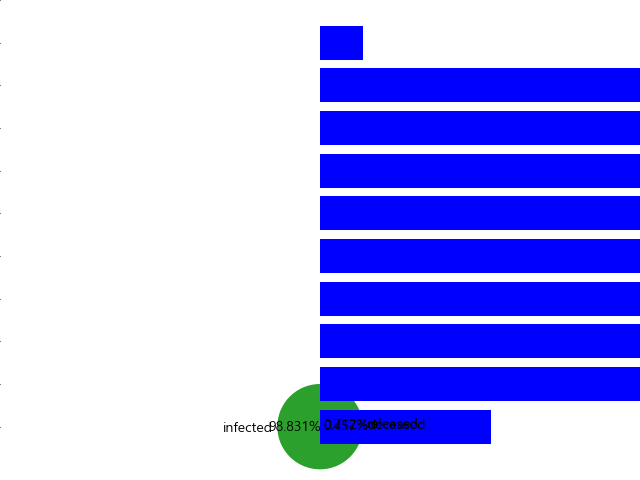

In [10]:
# draw pie chart

fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.axis('equal')
type_of_sex = ['deceased', 'released', 'infected']
patient_sex = [deceased,released,infected]
ax.pie(patient_sex, labels = type_of_sex, autopct='%1.3f%%')
plt.show()

### 나이대별 확진자의 수

In [11]:
# 나이대별 확진자의 수

age000 = 0
age010 = 0
age020 = 0
age030 = 0
age040 = 0
age050 = 0
age060 = 0
age070 = 0
age080 = 0
age090 = 0
age100 = 0
nope_age = 0

for i in range(len(raw_)):
    
    if(raw_[i][2] == ''):
        nope_age = nope_age + 1
    else:
        age_of_patient = 2020 - int(raw_[i][2])

        if(0 <= age_of_patient < 10):
            age000 = age000 + 1
        elif(10 <= age_of_patient < 20):
            age010 = age010 + 1
        elif(20 <= age_of_patient < 30):
            age020 = age020 + 1
        elif(30 <= age_of_patient < 40):
            age030 = age030 + 1
        elif(40 <= age_of_patient < 50):
            age040 = age040 + 1
        elif(50 <= age_of_patient < 60):
            age050 = age050 + 1
        elif(60 <= age_of_patient < 70):
            age060 = age060 + 1
        elif(70 <= age_of_patient < 80):
            age070 = age070 + 1
        elif(80 <= age_of_patient < 90):
            age080 = age080 + 1
        elif(90 <= age_of_patient < 100):
            age090 = age100 + 1
        else:
            age100 = age100 + 1
            
print("어린이 확진자 : " + str(age000))
print("10대 확진자 : " + str(age010))
print("20대 확진자 : " + str(age020))
print("30대 확진자 : " + str(age030))
print("40대 확진자 : " + str(age040))
print("50대 확진자 : " + str(age050))
print("60대 확진자 : " + str(age060))
print("70대 확진자 : " + str(age070))
print("80대 확진자 : " + str(age080))
print("90대 확진자 : " + str(age090))
print("100세 이상 확진자 : " + str(age100))
print("나이 미상 확진자 : " + str(nope_age))

어린이 확진자 : 4
10대 확진자 : 12
20대 확진자 : 148
30대 확진자 : 96
40대 확진자 : 114
50대 확진자 : 141
60대 확진자 : 96
70대 확진자 : 35
80대 확진자 : 18
90대 확진자 : 1
100세 이상 확진자 : 0
나이 미상 확진자 : 7203


In [12]:
# I wnat to use Korean!
from matplotlib import font_manager, rc
font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
rc('font', family=font_name)

# draw bar chart
type_of_age = ['어린이', '10대', '20대', '30대', '40대', '50대', '60대', '70대', '80대', '90대', '100세 이상']
patient_age = [age000,age010,age020,age030,age040,age050,age060,age070,age080,age090,age100]

y_pos = [i for i, _ in enumerate(type_of_age)]

plt.barh(y_pos, patient_age, color='blue')
plt.ylabel("나이대")
plt.xlabel("number of patients")
plt.title("나이대에 따른 확진자 수")

plt.yticks(y_pos, type_of_age)

plt.show()

<IPython.core.display.Javascript object>


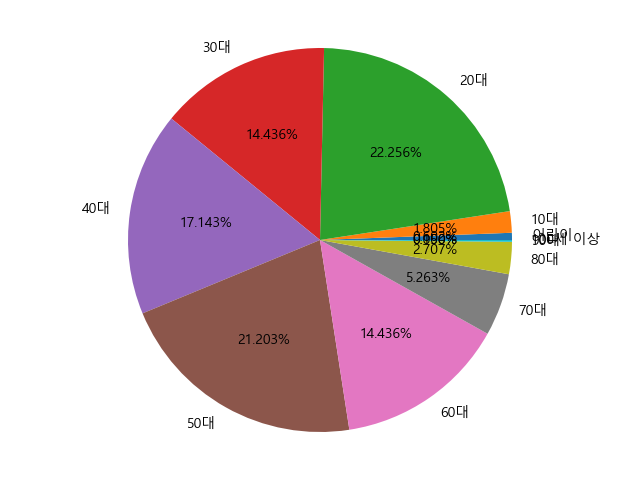

In [13]:
# I wnat to use Korean!
from matplotlib import font_manager, rc
font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
rc('font', family=font_name)

# draw pie chart

fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.axis('equal')
type_of_age = ['어린이', '10대', '20대', '30대', '40대', '50대', '60대', '70대', '80대', '90대', '100세 이상']
patient_age = [age000,age010,age020,age030,age040,age050,age060,age070,age080,age090,age100]
ax.pie(patient_age, labels = type_of_age, autopct='%1.3f%%')
plt.show()

### 주 활동 지역에 따른 분류

In [12]:
# 주 활동 지역에 대한 정보 획득하기
regions = []

for i in range(len(raw_)):
    region = raw_[i][4] 
    
    if(region == ''):
        pass
    else:        
        if region in regions:
            pass
        else:
            regions.append(region)
            
pprint.pprint(regions)

['filtered at airport',
 'capital area',
 'Jeollabuk-do',
 'Gwangju',
 'Daegu',
 'Gyeongsangbuk-do',
 'Jeju-do',
 'Busan',
 'Daejeon',
 'Chungcheongbuk-do',
 'Chungcheongnam-do',
 'Ulsan',
 'Gangwon-do',
 'Jeollanam-do']


In [13]:
# 주 활동 지역별 확진자 수 확인
regions_count = []

for i in range(len(regions) + 1):
    regions_count.append([])

for i in range(len(raw_)):
    region = raw_[i][4]
    
    for j in range(len(regions)):
        if(region == regions[j]):
            regions_count[j].append(1)

regions_patient = ()
    
for i in range(len(regions)):
    regions_patient = regions_patient + tuple((regions[i], sum(regions_count[i])))

pprint.pprint(regions_patient)

('filtered at airport',
 4,
 'capital area',
 191,
 'Jeollabuk-do',
 3,
 'Gwangju',
 11,
 'Daegu',
 57,
 'Gyeongsangbuk-do',
 140,
 'Jeju-do',
 4,
 'Busan',
 1,
 'Daejeon',
 13,
 'Chungcheongbuk-do',
 2,
 'Chungcheongnam-do',
 1,
 'Ulsan',
 2,
 'Gangwon-do',
 5,
 'Jeollanam-do',
 3)


### 감염 원인에 따른 분류

In [14]:
# 감염 원인들에 대한 정보 획득
reasons = []

for i in range(len(raw_)):
    reason = raw_[i][7] 
    
    if(reason == ''):
        pass
    else:        
        if reason in reasons:
            pass
        else:
            reasons.append(reason)
            
pprint.pprint(reasons)

['visit to Wuhan',
 'contact with patient',
 'contact with patient in Japan',
 'residence in Wuhan',
 'visit to Thailand',
 'contact with patient in Singapore',
 'visit to China',
 'visit to Daegu',
 'pilgrimage to Israel',
 'contact with patient in Daegu',
 'visit to Vietnam',
 'visit to Japan',
 'visit to Italy',
 'visit to ooo']


In [15]:
# 감염 원인별 확진자 수 확인
reasons_count = []

for i in range(len(reasons) + 1):
    reasons_count.append([])

for i in range(len(raw_)):
    reason = raw_[i][7]
    
    for j in range(len(reasons)):
        if(reason == reasons[j]):
            reasons_count[j].append(1)

reasons_patient = ()
    
for i in range(len(reasons)):
    reasons_patient = reasons_patient + tuple((reasons[i], sum(reasons_count[i])))

pprint.pprint(reasons_patient)

('visit to Wuhan',
 8,
 'contact with patient',
 76,
 'contact with patient in Japan',
 1,
 'residence in Wuhan',
 2,
 'visit to Thailand',
 2,
 'contact with patient in Singapore',
 2,
 'visit to China',
 2,
 'visit to Daegu',
 50,
 'pilgrimage to Israel',
 6,
 'contact with patient in Daegu',
 1,
 'visit to Vietnam',
 1,
 'visit to Japan',
 1,
 'visit to Italy',
 1,
 'visit to ooo',
 1)


### 감염 집단들에 따른 분류

In [16]:
# 감염 집단들에 대한 정보 획득
groups = []

for i in range(len(raw_)):
    group = raw_[i][6] 
    
    if(group == ''):
        pass
    else:        
        if group in groups:
            pass
        else:
            groups.append(group)
            
pprint.pprint(groups)

['Shincheonji Church',
 'Cheongdo Daenam Hospital',
 "Eunpyeong St. Mary's Hospital",
 'Pilgrimage']


In [17]:
# 감염 집단별 확진자 수 확인
groups_count = []

for i in range(len(groups) + 1):
    groups_count.append([])

for i in range(len(raw_)):
    group = raw_[i][6]
    
    for j in range(len(groups)):
        if(group == groups[j]):
            groups_count[j].append(1)

groups_patient = ()
    
for i in range(len(groups)):
    groups_patient = groups_patient + tuple((groups[i], sum(groups_count[i])))

pprint.pprint(groups_patient)

('Shincheonji Church',
 58,
 'Cheongdo Daenam Hospital',
 9,
 "Eunpyeong St. Mary's Hospital",
 13,
 'Pilgrimage',
 6)


### 누구로부터 감염되었는가? (슈퍼 전파자)

In [18]:
# 전파자에 대한 정보 획득
infection_by = []

for i in range(len(raw_)):
    infection = raw_[i][9] 
    
    if(infection == ''):
        pass
    else:        
        if infection in infection_by:
            pass
        else:
            infection_by.append(infection)
            
pprint.pprint(infection_by)

['3',
 '5',
 '6',
 '12',
 '4',
 '16',
 '15',
 '27',
 '83',
 '29',
 '20',
 '31',
 '136',
 '40',
 '56',
 '126',
 '113',
 '230',
 '30',
 '161',
 '246',
 '347',
 '372',
 '164',
 '627',
 '780',
 '188',
 '794',
 '835',
 '335',
 '938',
 '1251',
 '44',
 '1532',
 '1252',
 '1768',
 '1177',
 '1257',
 '1247',
 '2621',
 '121']


In [19]:
# 전파자에 의한 감염자 확인
count_infection_by = []

for i in range(len(infection_by) + 1):
    count_infection_by.append([])

for i in range(len(raw_)):
    infection = raw_[i][9]
    
    for j in range(len(infection_by)):
        if(infection == infection_by[j]):
            count_infection_by[j].append(1)

exporter_patient = ()
    
for i in range(len(infection_by)):
    exporter_patient = exporter_patient + tuple((infection_by[i], sum(count_infection_by[i])))

pprint.pprint(exporter_patient)

('3',
 2,
 '5',
 1,
 '6',
 5,
 '12',
 1,
 '4',
 1,
 '16',
 2,
 '15',
 2,
 '27',
 2,
 '83',
 2,
 '29',
 1,
 '20',
 1,
 '31',
 8,
 '136',
 1,
 '40',
 1,
 '56',
 1,
 '126',
 3,
 '113',
 1,
 '230',
 2,
 '30',
 1,
 '161',
 2,
 '246',
 2,
 '347',
 1,
 '372',
 3,
 '164',
 1,
 '627',
 1,
 '780',
 3,
 '188',
 1,
 '794',
 2,
 '835',
 1,
 '335',
 2,
 '938',
 1,
 '1251',
 1,
 '44',
 1,
 '1532',
 2,
 '1252',
 2,
 '1768',
 1,
 '1177',
 1,
 '1257',
 1,
 '1247',
 1,
 '2621',
 1,
 '121',
 1)


### 확진자의 추이

In [20]:
# 감염 날짜에 대한 정보 획득
infection_date = []

for i in range(len(raw_)):
    date = raw_[i][11] 
    
    if(date == ''):
        pass
    else:        
        if date in infection_date:
            pass
        else:
            infection_date.append(date)
            
pprint.pprint(infection_date)

['2020-01-20',
 '2020-01-24',
 '2020-01-26',
 '2020-01-27',
 '2020-01-30',
 '2020-01-31',
 '2020-02-01',
 '2020-02-02',
 '2020-02-04',
 '2020-02-05',
 '2020-02-06',
 '2020-02-09',
 '2020-02-10',
 '2020-02-16',
 '2020-02-18',
 '2020-02-19',
 '2020-02-20',
 '2020-02-21',
 '2020-02-22',
 '2020-02-23',
 '2020-02-24',
 '2020-02-25',
 '2020-02-26',
 '2020-02-27',
 '2020-02-28',
 '2020-02-29',
 '2020-03-01',
 '2020-03-02',
 '2020-03-03',
 '2020-03-04',
 '2020-03-05',
 '2020-03-06',
 '2020-03-07',
 '2020-03-08',
 '2020-03-09',
 '2020-03-10',
 '2020-03-11']


In [21]:
# 첫 확진자 발생부터 지금까지의 날짜별 감염자 확인
count_infection_date = []
count_infection_date_ = []

for i in range(len(infection_date) + 1):
    count_infection_date.append([])

for i in range(len(raw_)):
    date = raw_[i][11]
    
    for j in range(len(infection_date)):
        if(date == infection_date[j]):
            count_infection_date[j].append(1)

num_of_patient_in_date = ()
    
for i in range(len(infection_date)):
    num_of_patient_in_date = num_of_patient_in_date + tuple((infection_date[i], sum(count_infection_date[i])))
    count_infection_date_.append(sum(count_infection_date[i]))

pprint.pprint(num_of_patient_in_date)

('2020-01-20',
 1,
 '2020-01-24',
 1,
 '2020-01-26',
 1,
 '2020-01-27',
 1,
 '2020-01-30',
 3,
 '2020-01-31',
 4,
 '2020-02-01',
 1,
 '2020-02-02',
 3,
 '2020-02-04',
 1,
 '2020-02-05',
 5,
 '2020-02-06',
 3,
 '2020-02-09',
 3,
 '2020-02-10',
 1,
 '2020-02-16',
 2,
 '2020-02-18',
 9,
 '2020-02-19',
 27,
 '2020-02-20',
 38,
 '2020-02-21',
 100,
 '2020-02-22',
 229,
 '2020-02-23',
 169,
 '2020-02-24',
 231,
 '2020-02-25',
 143,
 '2020-02-26',
 287,
 '2020-02-27',
 504,
 '2020-02-28',
 571,
 '2020-02-29',
 812,
 '2020-03-01',
 1062,
 '2020-03-02',
 600,
 '2020-03-03',
 516,
 '2020-03-04',
 438,
 '2020-03-05',
 518,
 '2020-03-06',
 483,
 '2020-03-07',
 367,
 '2020-03-08',
 248,
 '2020-03-09',
 131,
 '2020-03-10',
 242,
 '2020-03-11',
 114)


<IPython.core.display.Javascript object>


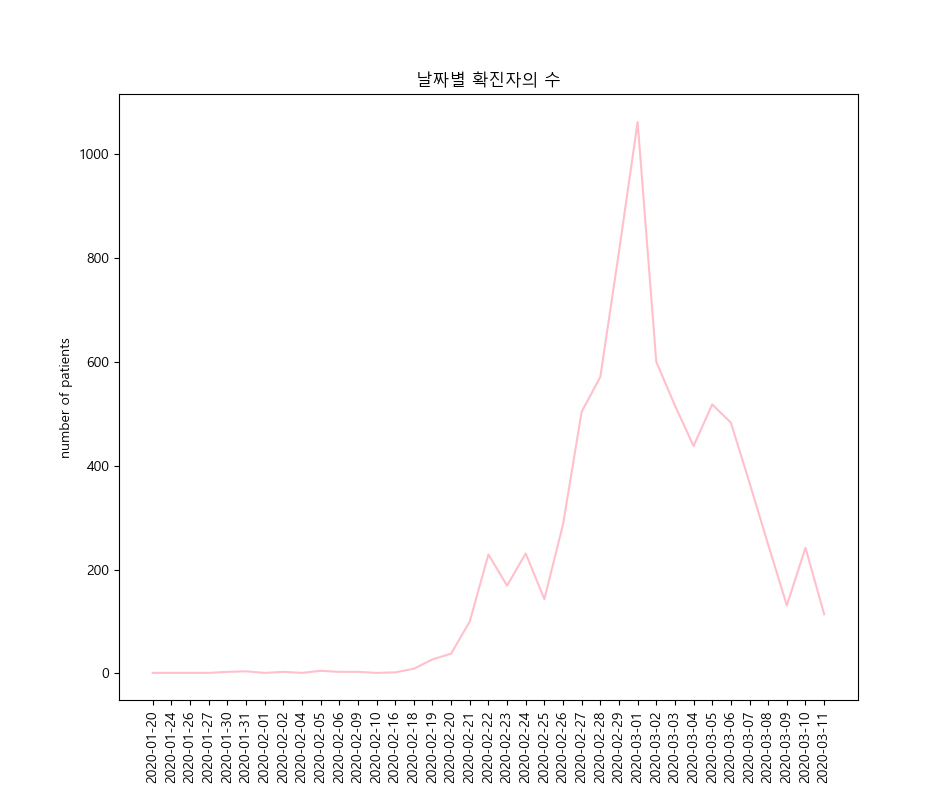

In [23]:
# I wnat to use Korean!
from matplotlib import font_manager, rc
font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
rc('font', family=font_name)

# draw line graph
dates = infection_date
count = count_infection_date_

x_pos = [i for i, _ in enumerate(dates)]

plt.plot(x_pos, count, color='pink')
plt.xlabel("date")
plt.ylabel("number of patients")
plt.title("날짜별 확진자의 수")

plt.xticks(x_pos, dates, rotation=90)

plt.show()

In [24]:
# 누적 확진자 수 만들기
count_infection_date_accumulated = []

acc_count = 0

for i in range(len(count_infection_date_)):
    acc_count = acc_count + count_infection_date_[i]
    count_infection_date_accumulated.append(acc_count)

count_infection_date_accumulated

[1,
 2,
 3,
 4,
 7,
 11,
 12,
 15,
 16,
 21,
 24,
 27,
 28,
 30,
 39,
 66,
 104,
 204,
 433,
 602,
 833,
 976,
 1263,
 1767,
 2338,
 3150,
 4212,
 4812,
 5328,
 5766,
 6284,
 6767,
 7134,
 7382,
 7513,
 7755,
 7869]

<IPython.core.display.Javascript object>


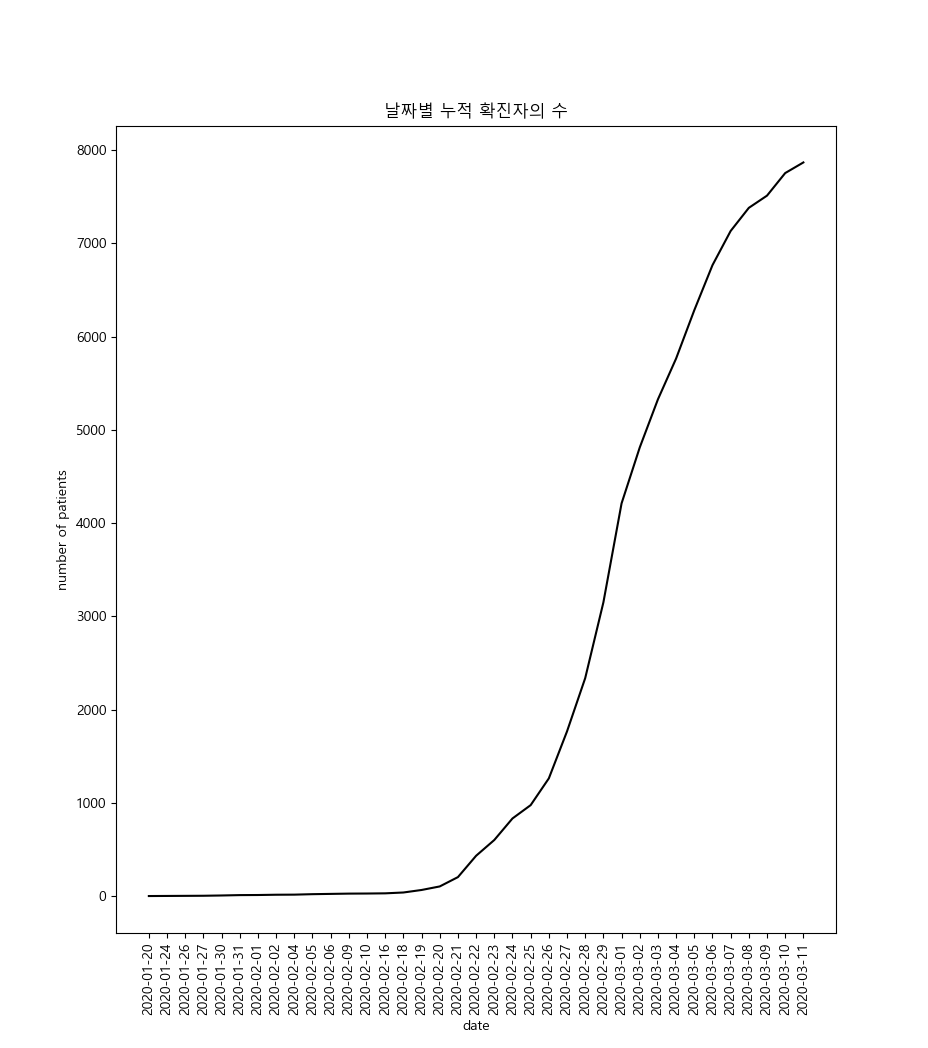

In [25]:
# I wnat to use Korean!
from matplotlib import font_manager, rc
font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
rc('font', family=font_name)

# draw line graph
dates = infection_date
counts = count_infection_date_accumulated

x_pos = [i for i, _ in enumerate(dates)]

plt.plot(x_pos, counts, color='black')
plt.xlabel("date")
plt.ylabel("number of patients")
plt.title("날짜별 누적 확진자의 수")

plt.xticks(x_pos, dates, rotation=90)

plt.show()

### 퇴원자의 추이

In [27]:
# 퇴원 날짜에 대한 정보 획득
released_date = []

for i in range(len(raw_)):
    date = raw_[i][12] 
    
    if(date == ''):
        pass
    else:        
        if date in released_date:
            pass
        else:
            released_date.append(date)
            
pprint.pprint(released_date)

['2020-02-06',
 '2020-02-05',
 '2020-02-12',
 '2020-02-09',
 '2020-03-02',
 '2020-02-19',
 '2020-02-15',
 '2020-02-24',
 '2020-02-10',
 '2020-02-18',
 '2020-02-21',
 '2020-02-29',
 '2020-02-27',
 '2020-03-05',
 '2020-02-17',
 '2020-03-04',
 '2020-02-26',
 '2020-03-03',
 '2020-02-28',
 '2020-03-01',
 '2020-03-07']


In [28]:
# 첫 퇴원자 발생부터 지금까지의 날짜별 퇴원자 확인
count_released_date = []
count_released_date_ = []

for i in range(len(released_date) + 1):
    count_released_date.append([])

for i in range(len(raw_)):
    date = raw_[i][12]
    
    for j in range(len(released_date)):
        if(date == released_date[j]):
            count_released_date[j].append(1)

num_of_patient_in_released_date = ()
    
for i in range(len(released_date)):
    num_of_patient_in_released_date = num_of_patient_in_released_date + tuple((released_date[i], sum(count_released_date[i])))
    count_released_date_.append(sum(count_released_date[i]))

pprint.pprint(num_of_patient_in_released_date)

('2020-02-06',
 1,
 '2020-02-05',
 1,
 '2020-02-12',
 3,
 '2020-02-09',
 1,
 '2020-03-02',
 3,
 '2020-02-19',
 4,
 '2020-02-15',
 2,
 '2020-02-24',
 4,
 '2020-02-10',
 1,
 '2020-02-18',
 2,
 '2020-02-21',
 1,
 '2020-02-29',
 2,
 '2020-02-27',
 4,
 '2020-03-05',
 3,
 '2020-02-17',
 1,
 '2020-03-04',
 11,
 '2020-02-26',
 2,
 '2020-03-03',
 7,
 '2020-02-28',
 1,
 '2020-03-01',
 1,
 '2020-03-07',
 1)


<IPython.core.display.Javascript object>


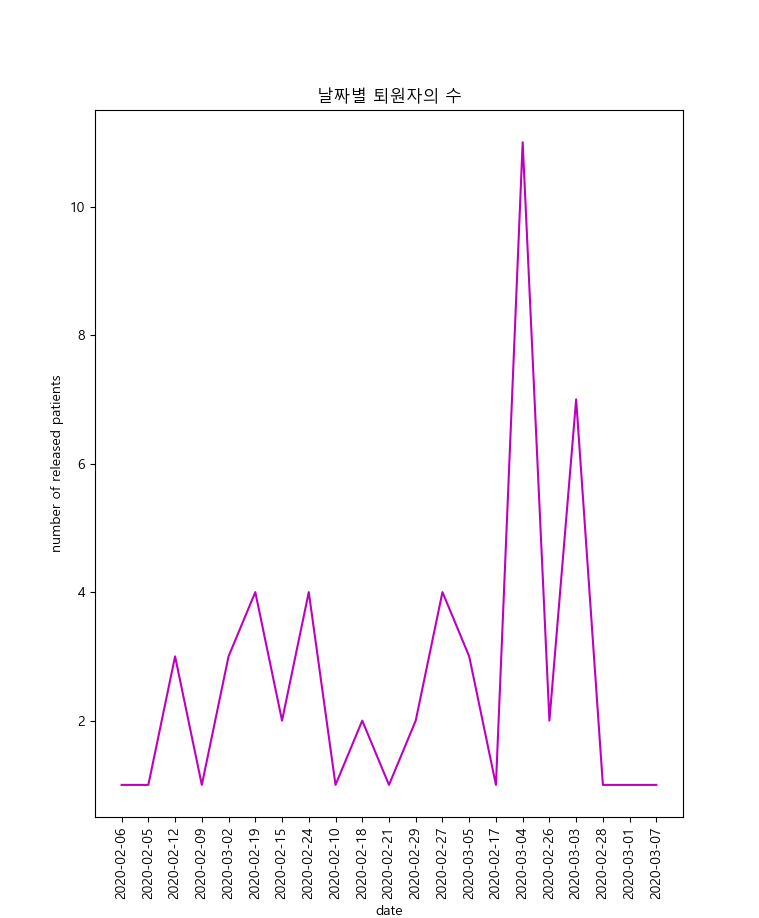

In [29]:
# I wnat to use Korean!
from matplotlib import font_manager, rc
font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
rc('font', family=font_name)

# draw line graph
dates = released_date
count = count_released_date_

x_pos = [i for i, _ in enumerate(dates)]

plt.plot(x_pos, count, color='m')
plt.xlabel("date")
plt.ylabel("number of released patients")
plt.title("날짜별 퇴원자의 수")

plt.xticks(x_pos, dates, rotation=90)

plt.show()

In [30]:
# 누적 퇴원자 수 만들기
count_released_date_accumulated = []

acc_count = 0

for i in range(len(count_released_date_)):
    acc_count = acc_count + count_released_date_[i]
    count_released_date_accumulated.append(acc_count)

count_released_date_accumulated

[1, 2, 5, 6, 9, 13, 15, 19, 20, 22, 23, 25, 29, 32, 33, 44, 46, 53, 54, 55, 56]

<IPython.core.display.Javascript object>


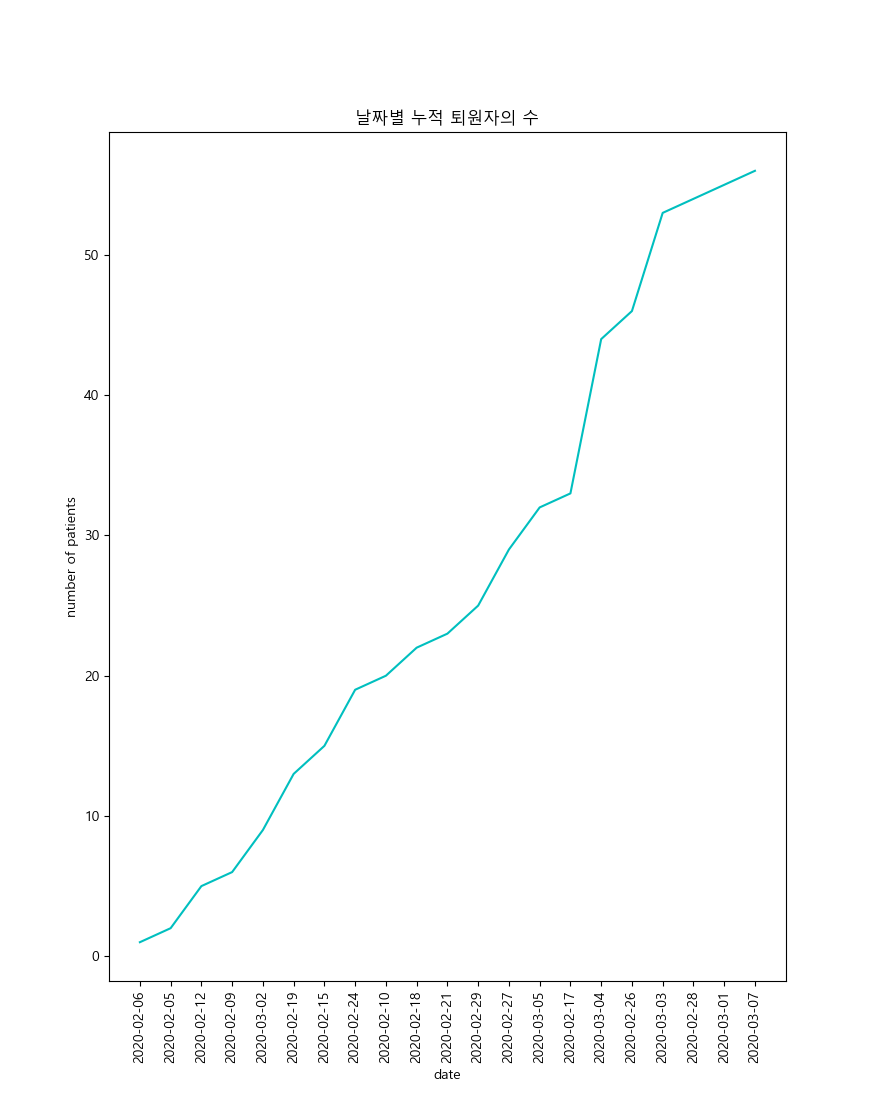

In [31]:
# I wnat to use Korean!
from matplotlib import font_manager, rc
font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
rc('font', family=font_name)

# draw line graph
dates = released_date
counts = count_released_date_accumulated

x_pos = [i for i, _ in enumerate(dates)]

plt.plot(x_pos, counts, color='c')
plt.xlabel("date")
plt.ylabel("number of patients")
plt.title("날짜별 누적 퇴원자의 수")

plt.xticks(x_pos, dates, rotation=90)

plt.show()

### 확진자와 퇴원자 같이 그래프 그리기